In [ ]:
from gensim.models import Word2Vec, FastText  # Import necessary libraries
from gensim.test.utils import common_texts
from gensim.corpora import Dictionary
import numpy as np

In [ ]:
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "A dog is a man's best friend",
    "Cats are very independent animals",
]

In [ ]:
# Preprocessing - Tokenization and lowercase
tokenized_sentences = [s.lower().split() for s in sentences]
print(tokenized_sentences)

[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'], ['a', 'dog', 'is', 'a', "man's", 'best', 'friend'], ['cats', 'are', 'very', 'independent', 'animals']]


# 1. Word2Vec

In [ ]:

#  - Train a Word2Vec model
model_w2v = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, epochs=10)

In [ ]:
# Accessing word embedding
print(model_w2v.wv['dog'])  # Returns the vector representation of the word "dog"

[-8.6200209e-03  3.6631965e-03  5.1971395e-03  5.7453541e-03
  7.4662189e-03 -6.1680567e-03  1.1054849e-03  6.0537793e-03
 -2.8411085e-03 -6.1727408e-03 -4.1228149e-04 -8.3780782e-03
 -5.6057060e-03  7.1123792e-03  3.3436734e-03  7.2191376e-03
  6.8010385e-03  7.5391768e-03 -3.7852193e-03 -5.6621403e-04
  2.3448556e-03 -4.5156591e-03  8.3898818e-03 -9.8585701e-03
  6.7604808e-03  2.9183186e-03 -4.9386271e-03  4.4066231e-03
 -1.7414397e-03  6.7101410e-03  9.9608907e-03 -4.3623983e-03
 -5.9841119e-04 -5.6895888e-03  3.8417238e-03  2.7892499e-03
  6.8909354e-03  6.0892156e-03  9.5307864e-03  9.2769349e-03
  7.9081804e-03 -6.9929375e-03 -9.1587650e-03 -3.5457744e-04
 -3.0984106e-03  7.9003088e-03  5.9339805e-03 -1.5590396e-03
  1.5083445e-03  1.7855077e-03  7.8167384e-03 -9.5205437e-03
 -2.0108896e-04  3.4725121e-03 -9.4467832e-04  8.3815288e-03
  9.0126637e-03  6.5334882e-03 -7.0520287e-04  7.7148648e-03
 -8.5372468e-03  3.1997145e-03 -4.6363613e-03 -5.0893268e-03
  3.5912457e-03  5.37123

# ***2. GloVe (using pre-trained GloVe embeddings)***




In [ ]:
#
#  Load pre-defined Glove embeddings file

import numpy as np

def load_glove_embeddings(filepath):
    word_index = {}
    embedding_matrix = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:  # Add a try-except block
                values = line.strip().split()  # Strip whitespace from line
                word = values[0]
                vector = np.asarray(values[1:], dtype='float32')
                # Check if the vector has the expected size (100 in this case)
                if vector.shape[0] == 100:  # Assuming 100-dimensional embeddings
                    word_index[word] = len(word_index)
                    embedding_matrix.append(vector)
                else:
                    print(f"Skipping line due to incorrect vector size: {line.strip()}")
            except ValueError:  # Handle lines causing errors
                print(f"Skipping line: {line.strip()}")  # Print the skipped line
                continue
    return np.array(embedding_matrix), word_index


In [ ]:
# Load GloVe embeddings
glove_embeddings, glove_word_index = load_glove_embeddings('/content/glove.6B.100d.txt')

Skipping line due to incorrect vector size: wallan 0.093209 -0.49072 -0.14923 0.62567 -0.22452 -0.12542 0.090346 -0.13959 0.70497 -0.19994 -0.030796 -0.19368 0.16187 0.43408 -0.33708 0.36289 -0.091649 -0.19885 0.29823 -0.


In [ ]:
# Accessing word embedding using GloVe
word = 'cat'
if word in glove_word_index:
    embedding = glove_embeddings[glove_word_index[word]]
    print(embedding)

[ 0.23088    0.28283    0.6318    -0.59411   -0.58599    0.63255
  0.24402   -0.14108    0.060815  -0.7898    -0.29102    0.14287
  0.72274    0.20428    0.1407     0.98757    0.52533    0.097456
  0.8822     0.51221    0.40204    0.21169   -0.013109  -0.71616
  0.55387    1.1452    -0.88044   -0.50216   -0.22814    0.023885
  0.1072     0.083739   0.55015    0.58479    0.75816    0.45706
 -0.28001    0.25225    0.68965   -0.60972    0.19578    0.044209
 -0.31136   -0.68826   -0.22721    0.46185   -0.77162    0.10208
  0.55636    0.067417  -0.57207    0.23735    0.4717     0.82765
 -0.29263   -1.3422    -0.099277   0.28139    0.41604    0.10583
  0.62203    0.89496   -0.23446    0.51349    0.99379    1.1846
 -0.16364    0.20653    0.73854    0.24059   -0.96473    0.13481
 -0.0072484  0.33016   -0.12365    0.27191   -0.40951    0.021909
 -0.6069     0.40755    0.19566   -0.41802    0.18636   -0.032652
 -0.78571   -0.13847    0.044007  -0.084423   0.04911    0.24104
  0.45273   -0.18682 

# 3. *FastText*

In [ ]:
#  - Train a FastText model
model_ft = FastText(tokenized_sentences, vector_size=100, window=5, min_count=1, epochs=10)

In [ ]:
# Accessing word embedding
print(model_ft.wv['cat'])

[-2.4042286e-03 -1.1288075e-03 -1.9931134e-03  2.2633136e-03
 -8.1443664e-04 -2.3870046e-04  8.6884614e-04  3.7295502e-03
  2.5860614e-03  4.5312271e-03  1.3753325e-03 -2.4032446e-03
 -2.7827274e-03  8.4900687e-04  1.4547015e-03  2.2072273e-03
  1.0753984e-03  7.7017001e-04 -1.4877118e-03  7.0436561e-04
 -2.5166303e-03  4.4705253e-03 -2.1713227e-03  8.8416442e-04
 -8.7026396e-04 -4.1374941e-03 -4.5416122e-03 -1.7578892e-03
 -9.2180133e-05  1.2925343e-03 -2.5069705e-04  5.2647670e-03
  9.5469621e-04  5.2611716e-03  1.3251301e-03 -2.0645580e-03
 -1.0489278e-03 -1.0506148e-03  5.7524553e-04 -3.2048572e-03
 -5.8846618e-04 -4.4999178e-03 -3.8658574e-03  1.3450285e-03
 -6.6365669e-03 -2.5845070e-03 -3.3100648e-04  3.3270011e-03
 -4.2480081e-03 -9.0033055e-04 -1.2038100e-03 -3.8191844e-03
  2.0313845e-03 -3.4448877e-04 -1.9507406e-04  3.3107018e-03
 -5.3424196e-04  3.3445985e-03  2.5182951e-03 -3.9758659e-03
  6.9797249e-04  1.0787561e-03 -2.2224763e-03  1.5449071e-03
  5.1351567e-03  2.34286

## 4. Bag-of-Words

In [ ]:
import pandas as pd
import numpy as np
import collections
import re

In [ ]:
doc1 = 'Game of Thrones is an amazing tv series!'
doc2 = 'Game of Thrones is the best tv series!'
doc3 = 'Game of Thrones is so great'

In [ ]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()
l_doc2 = re.sub(r"[^a-zA-Z0-9]", " ", doc2.lower()).split()
l_doc3 = re.sub(r"[^a-zA-Z0-9]", " ", doc3.lower()).split()

In [ ]:
wordset = set(l_doc1).union(set(l_doc2)).union(set(l_doc3))

In [ ]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [ ]:
bow1 = calculateBOW(wordset,l_doc1)
bow2 = calculateBOW(wordset,l_doc2)
bow3 = calculateBOW(wordset,l_doc3)
df_bow = pd.DataFrame([bow1,bow2,bow3])
df_bow.head()

,game,is,the,great,thrones,amazing,best,tv,series,of,so,an
0,1,1,0,0,1,1,0,1,1,1,0,1
1,1,1,1,0,1,0,1,1,1,1,0,0
2,1,1,0,1,1,0,0,0,0,1,1,0


# Continuous Bag-of-Words

In [ ]:
# Re-import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Define the corpus
corpus = [
    'The cat sat on the mat',
    'The dog ran in the park',
    'The bird sang in the tree'
]

In [ ]:
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus into vector of integers:")
print(sequences)

After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [ ]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

In [ ]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
y = to_categorical(targets, num_classes=vocab_size)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


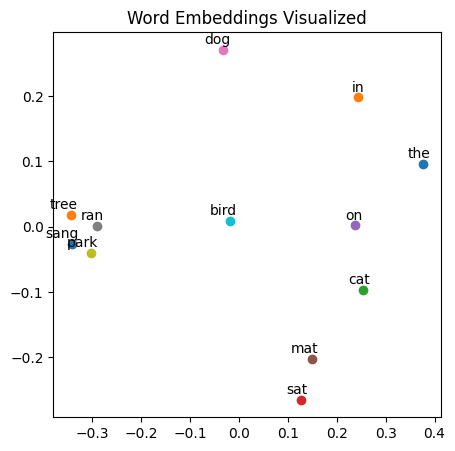

In [ ]:
# Extract the embeddings
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for word, idx in tokenizer.word_index.items():
    x, y = reduced_embeddings[idx]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.title("Word Embeddings Visualized")
plt.show()